## **Probabilistic Hough Transform**

In [20]:
import numpy as np
# import cv2 as cv

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

from skimage.transform import probabilistic_hough_line

from skimage import io, color

# Read the image using skimage
# image = io.imread('D:/Soccer Events/Plan Hough/world_cup_2006.png')


In [21]:
from PIL import Image
import numpy as np

# Open the image using PIL
image = Image.open('./assets/world_cup_2006.png')

# Convert to grayscale
gray_image = image.convert('L')

# Convert to numpy array if needed for further processing
image = np.array(gray_image)

print(gray_image_np)


[[  3   7  16 ...  22  22  23]
 [  3   7  16 ...  22  22  23]
 [  3   7  16 ...  22  23  22]
 ...
 [  4  10  56 ... 107 110 110]
 [  4  10  55 ... 107 107 106]
 [  4   8  55 ... 105 104 101]]


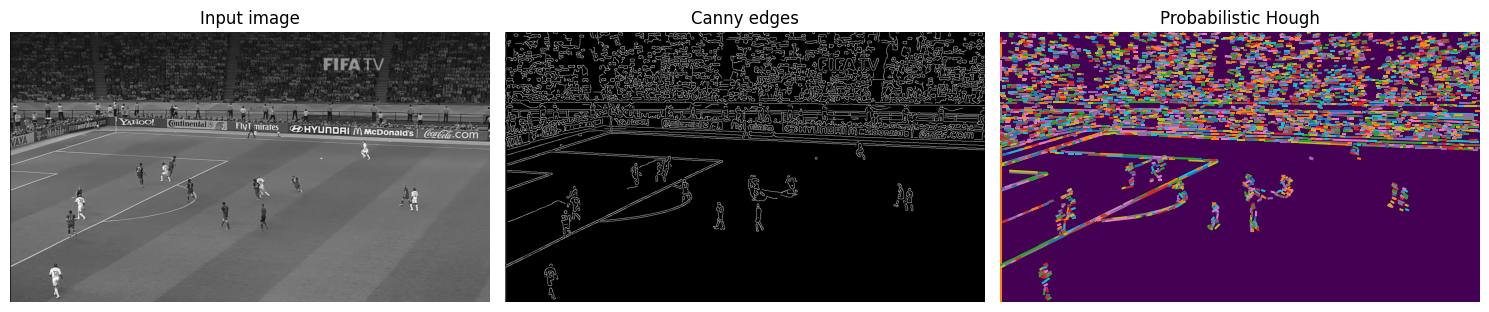

In [18]:


# Line finding using the Probabilistic Hough Transform
# image = data.camera()
# image = cv.imread('D:\Soccer Events\Plan Hough\world_cup_2006.png', cv.IMREAD_GRAYSCALE)
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5, line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

## **Line Hough Transform**

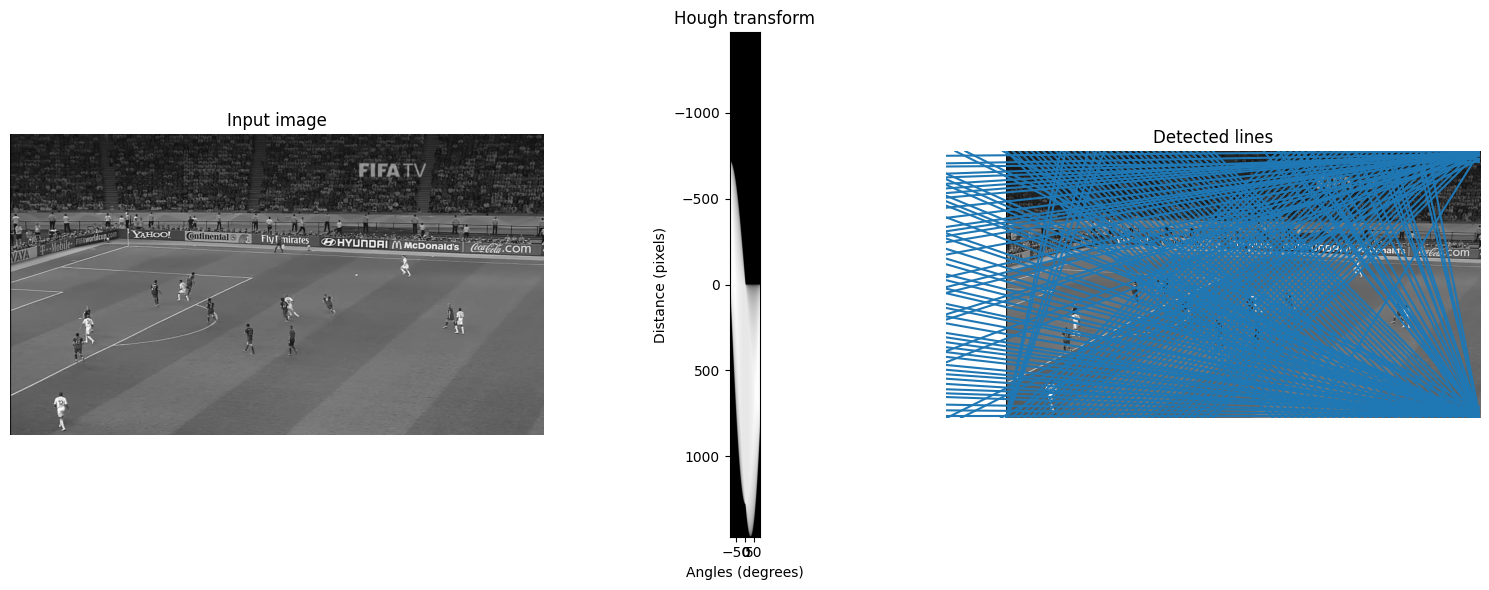

In [22]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
# image = np.zeros((200, 200))
# idx = np.arange(25, 175)
# image[idx, idx] = 255
# image[draw_line(45, 25, 25, 175)] = 255
# image[draw_line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [
    np.rad2deg(theta[0] - angle_step),
    np.rad2deg(theta[-1] + angle_step),
    d[-1] + d_step,
    d[0] - d_step,
]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

plt.tight_layout()
plt.show()

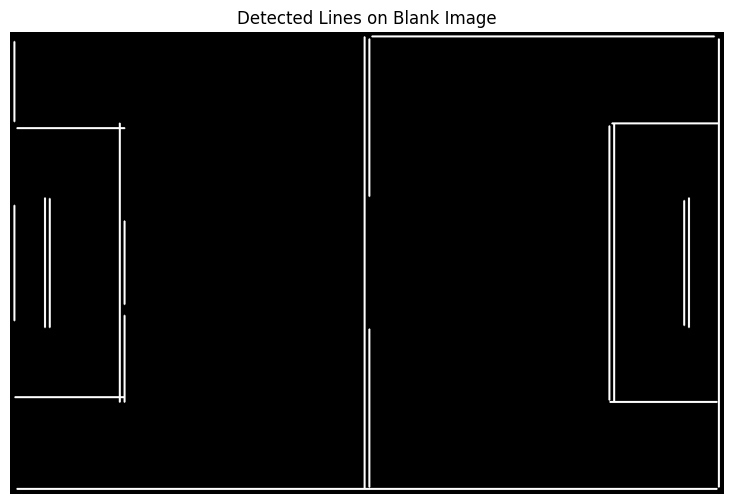

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/world_cup_template.png'  # Replace with the actual path to the image
image = cv2.imread(image_path)
original_image = image.copy()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# # Draw the lines on the original image
# if lines is not None:
#     for line in lines:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# # Display the original image with detected lines
# plt.figure(figsize=(10, 6))
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.title('Detected Lines on Soccer Field')
# plt.axis('off')
# plt.show()

# Create a blank image with the same dimensions as the original image
line_image = np.zeros_like(image)

# Draw the lines on the blank image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

# Convert line_image to RGB for displaying with matplotlib
line_image_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)

# Display the line image
plt.figure(figsize=(10, 6))
plt.imshow(line_image_rgb)
plt.title('Detected Lines on Blank Image')
plt.axis('off')
plt.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = './assets/world_cup_template.png'  # Replace with the actual path to the image
image = cv2.imread(image_path)

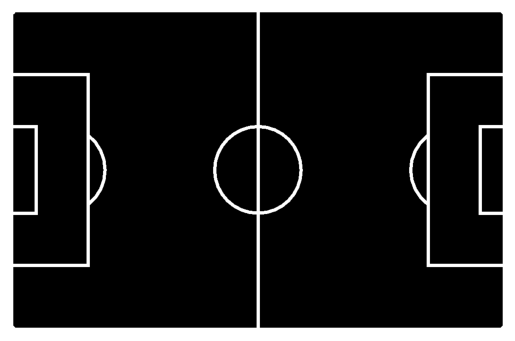

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the image
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

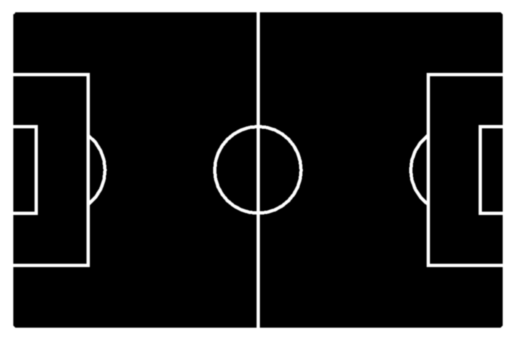

In [6]:
# Apply Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Show the image
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

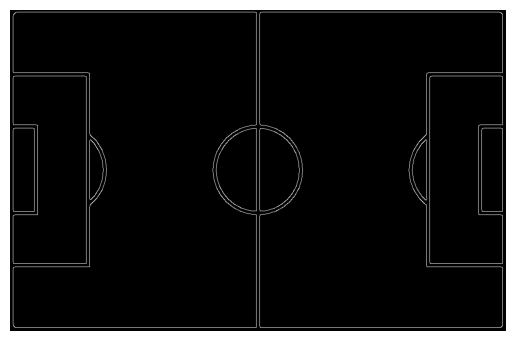

In [7]:
# Perform edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)
# Show the image
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6..1042].


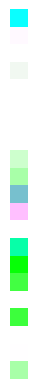

In [8]:

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)
# Show the image
plt.imshow(lines, cmap='gray')
plt.axis('off')
plt.show()

In [9]:

# Initialize a list to hold the points
line_points = []

# Extract the points from the detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        line_points.append(((x1, y1), (x2, y2)))



In [10]:
# Display the points
print("Detected line points:")
for i, points in enumerate(line_points):
    print(f"Line {i + 1}: Start {points[0]}, End {points[1]}")

Detected line points:
Line 1: Start (10, 672), End (1039, 672)
Line 2: Start (532, 6), End (1035, 6)
Line 3: Start (1042, 669), End (1042, 10)
Line 4: Start (6, 131), End (6, 14)
Line 5: Start (528, 669), End (528, 437)
Line 6: Start (521, 671), End (521, 7)
Line 7: Start (888, 544), End (888, 134)
Line 8: Start (881, 541), End (881, 138)
Line 9: Start (161, 544), End (161, 134)
Line 10: Start (168, 400), End (168, 278)
Line 11: Start (10, 141), End (168, 141)
Line 12: Start (885, 134), End (1041, 134)
Line 13: Start (882, 544), End (1039, 544)
Line 14: Start (7, 537), End (168, 537)
Line 15: Start (6, 424), End (6, 255)
Line 16: Start (58, 434), End (58, 245)
Line 17: Start (991, 431), End (991, 248)
Line 18: Start (51, 434), End (51, 244)
Line 19: Start (998, 434), End (998, 244)
Line 20: Start (528, 241), End (528, 10)
Line 21: Start (168, 544), End (168, 417)


In [11]:
# Optionally, visualize the detected lines on a blank image
line_image = np.zeros_like(image)
for points in line_points:
    cv2.line(line_image, points[0], points[1], (255, 255, 255), 2)

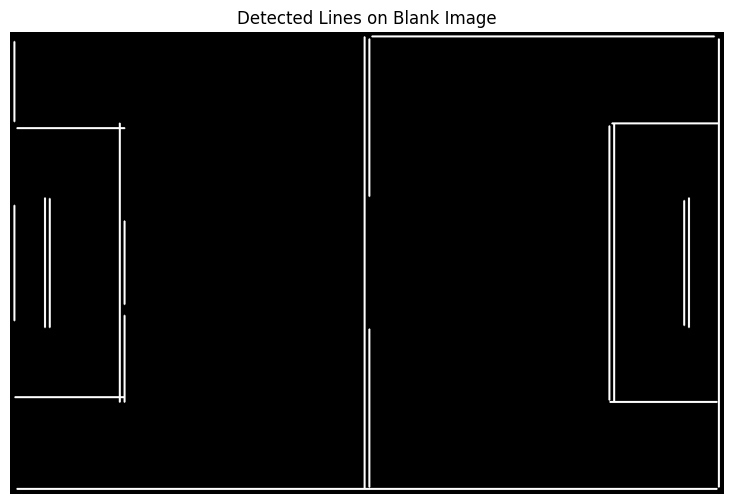

In [12]:
# Convert line_image to RGB for displaying with matplotlib
line_image_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)

# Display the line image
plt.figure(figsize=(10, 6))
plt.imshow(line_image_rgb)
plt.title('Detected Lines on Blank Image')
plt.axis('off')
plt.show()


Detected line points:
Line 1: Start (2, 719), End (2, 66)
Line 2: Start (82, 583), End (504, 377)
Line 3: Start (6, 624), End (330, 465)
Line 4: Start (419, 246), End (549, 248)
Line 5: Start (310, 267), End (652, 284)
Line 6: Start (801, 245), End (1035, 253)
Line 7: Start (746, 261), End (1087, 273)
Line 8: Start (336, 225), End (673, 237)
Line 9: Start (689, 288), End (879, 297)
Line 10: Start (729, 212), End (846, 214)
Line 11: Start (746, 253), End (979, 261)
Line 12: Start (322, 468), End (429, 416)
Line 13: Start (419, 243), End (552, 243)
Line 14: Start (824, 269), End (938, 273)
Line 15: Start (799, 211), End (924, 211)
Line 16: Start (988, 188), End (1105, 188)
Line 17: Start (563, 235), End (842, 245)
Line 18: Start (1130, 279), End (1247, 281)
Line 19: Start (931, 243), End (1032, 247)
Line 20: Start (23, 208), End (236, 208)
Line 21: Start (128, 210), End (332, 210)
Line 22: Start (756, 253), End (872, 253)
Line 23: Start (603, 247), End (715, 249)
Line 24: Start (341, 224

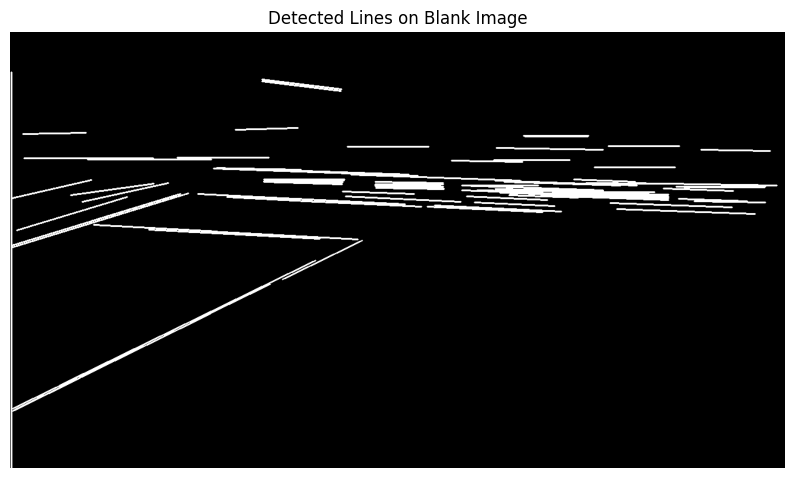

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/world_cup_2006.png'  # Replace with the actual path to the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Initialize a list to hold the points
line_points = []

# Extract the points from the detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        line_points.append(((x1, y1), (x2, y2)))

# Display the points
print("Detected line points:")
for i, points in enumerate(line_points):
    print(f"Line {i + 1}: Start {points[0]}, End {points[1]}")

# Optionally, visualize the detected lines on a blank image
line_image = np.zeros_like(image)
for points in line_points:
    cv2.line(line_image, points[0], points[1], (255, 255, 255), 2)

# Convert line_image to RGB for displaying with matplotlib
line_image_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)

# Display the line image
plt.figure(figsize=(10, 6))
plt.imshow(line_image_rgb)
plt.title('Detected Lines on Blank Image')
plt.axis('off')
plt.show()


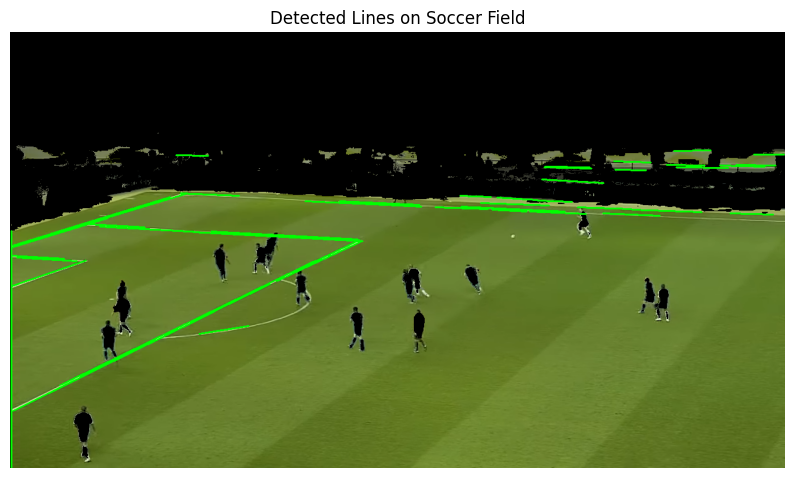

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./assets/green_region.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the original image with detected lines
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines on Soccer Field')
plt.axis('off')
plt.show()


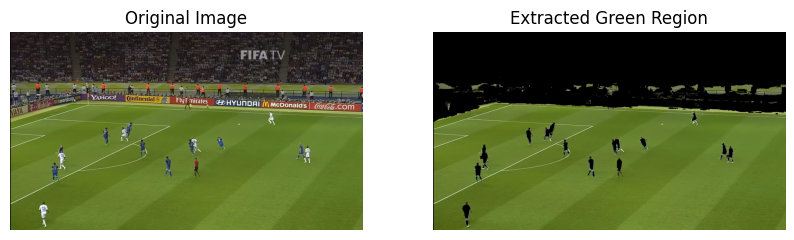

True

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./assets/world_cup_2006.png')

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for the green color in HSV
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])

# Create a mask for the green regions
mask = cv2.inRange(hsv, lower_green, upper_green)

# Apply the mask to extract the green regions from the original image
green_region = cv2.bitwise_and(image, image, mask=mask)

# Display the original image and the green region
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(green_region, cv2.COLOR_BGR2RGB))
plt.title('Extracted Green Region')
plt.axis('off')

plt.show()

# save green region as image
cv2.imwrite('./assets/green_region.png', green_region)

